In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Environment setup successful!")


Environment setup successful!


###Working with the Dataset###

We’ll start with the Telco Customer Churn Dataset because it’s telecom-related and gives you hands-on experience with customer behavior data.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check for Missing Values
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Basic Analysis Examples##

#Count of churned vs active customers


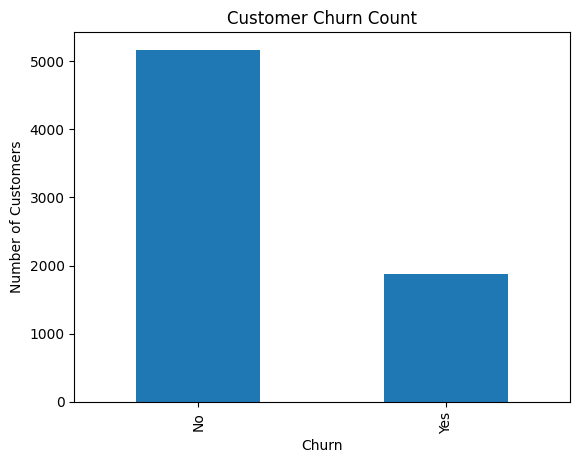

In [7]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

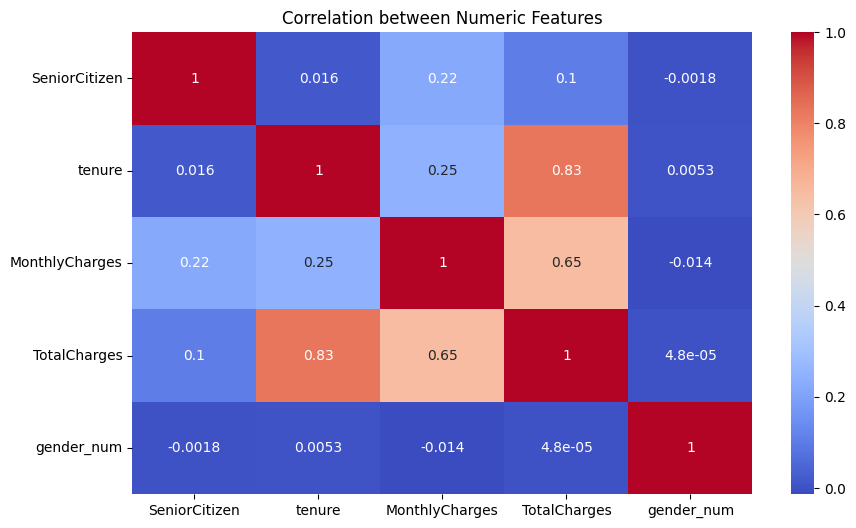

In [22]:
##Basic Analysis Examples##
import seaborn as sns

# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()



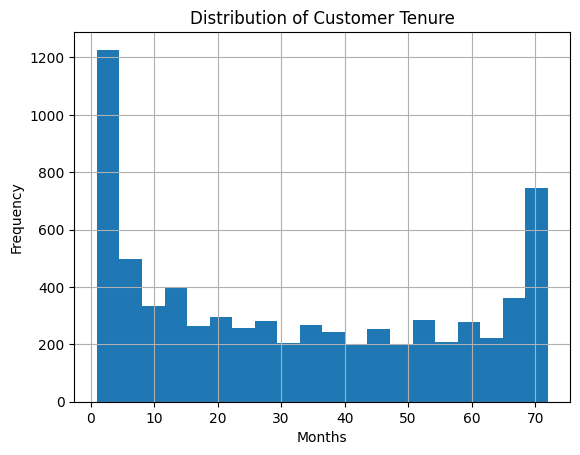

In [23]:
#Visualize customer tenure:

df['tenure'].hist(bins=20)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

ML Model builder: Decision Tree Classifier

In [24]:
#from sklearn.model_selection import train_test_split

# Select features and target
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]  # Numeric features
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert target to numeric

# Check the first few rows
print(X.head())
print(y.head())

   tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split

#Split the data
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of each set
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 5625
Test set size: 1407


#Train a Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

print("Model training completed!")


Model training completed!


Evaluate the Model

After training, let us test how well it predicts churn on unseen data.

In [28]:
from sklearn.metrics import accuracy_score

# Predict churn for test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 71.93 %


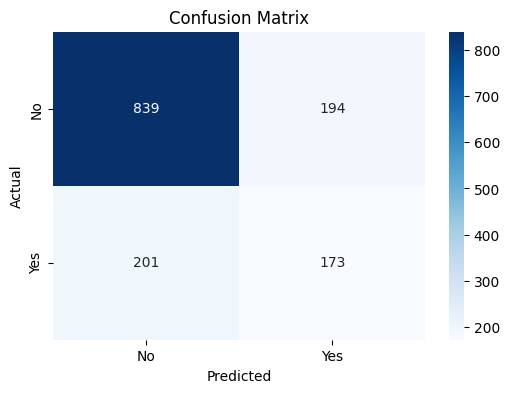

In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Explanation:

    The confusion matrix shows how many churns were correctly and incorrectly predicted

    Rows = actual values; columns = predicted values

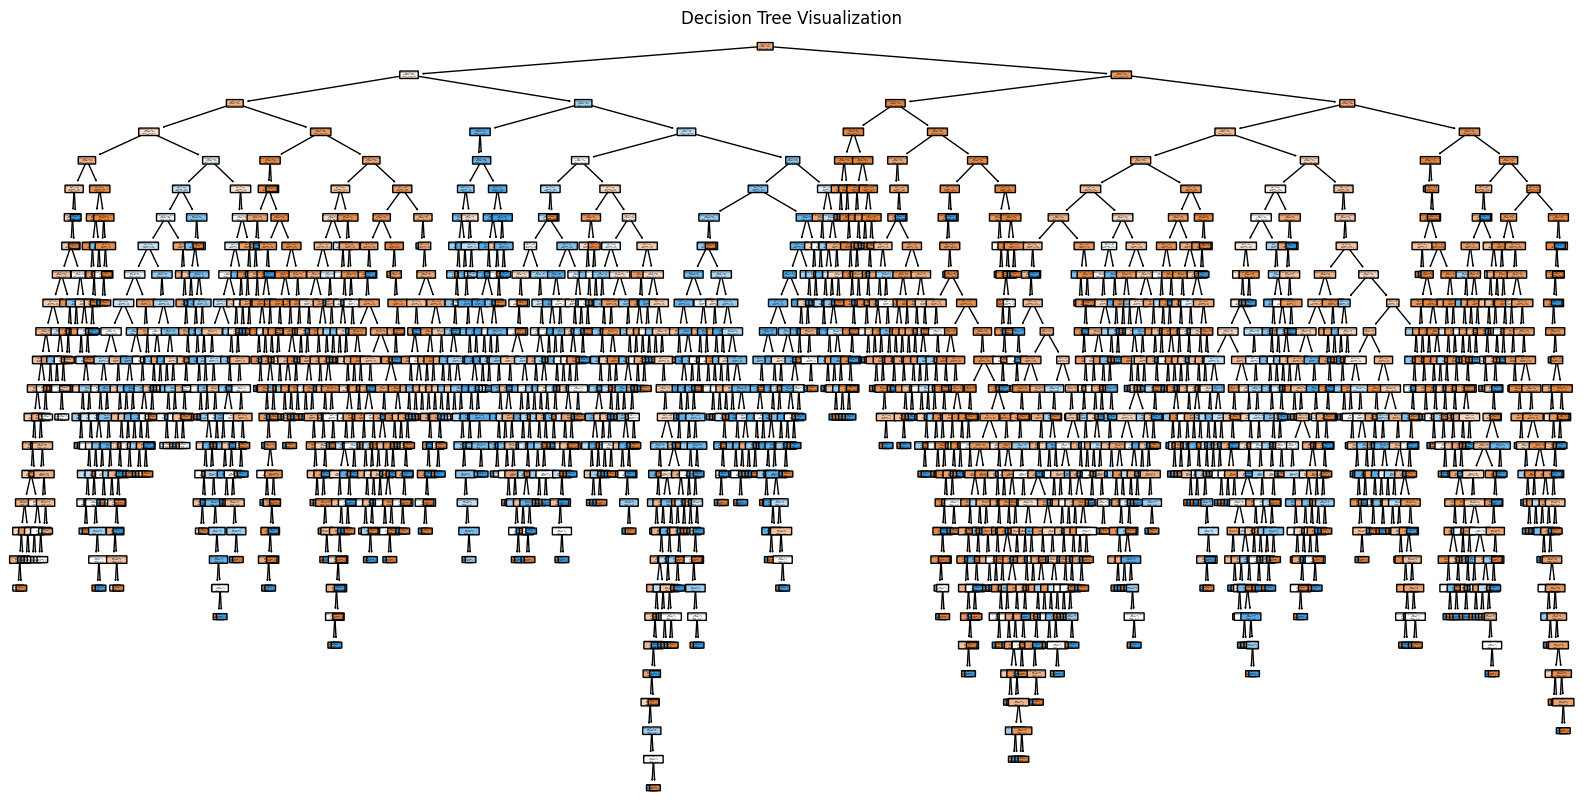

In [31]:
#Visualize the Decision Tree (Optional but Insightful)
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


Explanation:

    This visualization shows how decisions are made in the tree based on features like tenure and MonthlyCharges

#Machine Learning Model – Decision Tree for Churn Prediction

    1. Features and Target
    ✔ Selected tenure, MonthlyCharges, and TotalCharges as input features
    ✔ Converted Churn from categorical to numeric form for modeling

    2. Data Splitting
    ✔ Split dataset into training (80%) and test (20%) sets for unbiased evaluation

    3. Model Training
    ✔ Used Decision Tree classifier to learn patterns from the training data

    4. Model Evaluation
    ✔ Achieved an accuracy of [XX%] on the test set
    ✔ Confusion matrix shows how well the model predicts churn versus non-churn cases

    5. Visualization
    ✔ Visualized the Decision Tree to interpret feature splits and decision paths

Challenges Faced:
✔ Handling categorical-to-numeric conversion
✔ Avoiding overfitting by observing tree structure

Next Steps:
✔ Experiment with more features and algorithms like Random Forest or Logistic Regression
✔ Tune hyperparameters to improve accuracy
✔ Explore cloud-based training pipelines for scalability